Question 1
Consider the following Python module:
a = 0
def b():
 global a
 a = c(a)
def c(a):
 return a + 2
After importing the module into the interpreter, you execute:
>>> b()
>>> b()
>>> b()
>>> a
?
What value is displayed when the last expression (a) is evaluated? Explain your
answer by indicating what happens in every executed statement.

In [7]:
a = 0   # initial value of a is set to 0
def b():  # define function b()
 global a  # a is a gloabl variable rather than a local variable 
 a = c(a)  # inside function b(), a = c(a) is executed. The current value of a (which is 0) is passed as an argument to the function c().
def c(a):
 return a + 2  # inside function c(), a is incremented by 2, so a new value of 2 is returned.

b()  # first call to b. The returned value of 2 from c() is assigned to the global variable a.
b()  # second call to b. The global variable a is now 2. a=c(a) is executed, passing the current value a(2) to c(). Inside c(), 2 is incremented by 2, so the value of a is now 4.
b()  # third call to b. Similar as before, the returned value of global a is now 6.
print(a)   # print the last value of (a), which is evaluated as 6.

6


Question 2
Function fileLength(), given to you, takes the name of a file as input and returns
the length of the file:
>>> fileLength('midterm.py')
284
>>> fileLength('idterm.py')
Traceback (most recent call last):
File "<pyshell#34>", line 1, in <module>
 fileLength('idterm.py')
File "/Users/me/midterm.py", line 3, in fileLength
 infile = open(filename)
FileNotFoundError: [Errno 2] No such file or directory:
'idterm.py'
As shown above, if the file cannot be found by the interpreter or if it cannot be read
as a text file, an exception will be raised. Modify function fileLength() so that a
friendly message is printed instead:
>>> fileLength('midterm.py')
358
>>> fileLength('idterm.py')
File idterm.py not found.

In [13]:
#use a try/except statement
def fileLength(filename): 
    try: 
        infile = open(filename, 'r')  #open the file 
        contents = infile.read()  #read its contents
        infile.close()  
        length = len(contents)
        return length
    except FileNotFoundError:   #if the file is not found, execute the except block
        print("File", filename, "not found.")  
        
fileLength('Filelength.txt')  #call an existing file

123

In [14]:
fileLength('ilelength.txt') #call a non-existent file, an exception will be raised

File ilelength.txt not found.


Question 3
Write a class named Marsupial that can be used as shown below:
>>> m = Marsupial()
>>> m.put_in_pouch('doll')
>>> m.put_in_pouch('firetruck')
>>> m.put_in_pouch('kitten')
>>> m.pouch_contents()
['doll', 'firetruck', 'kitten']
Now write a class named Kangaroo as a subclass of Marsupial that inherits all the
attributes of Marsupial and also:
a. extends the Marsupial __init__ constructor to take, as input, the
coordinates x and y of the Kangaroo object,
b. supports method jump that takes number values dx and dy as input and
moves the kangaroo by dx units along the x-axis and by dy units along the yaxis, and
c. overloads the __str__ operator so it behaves as shown below.
>>> k = Kangaroo(0,0)
>>> print(k)
I am a Kangaroo located at coordinates (0,0)
>>> k.put_in_pouch('doll')
>>> k.put_in_pouch('firetruck')
>>> k.put_in_pouch('kitten')
>>> k.pouch_contents()
['doll', 'firetruck', 'kitten']
>>> k.jump(1,0)
>>> k.jump(1,0)
>>> k.jump(1,0)
>>> print(k)
I am a Kangaroo located at coordinates (3,0)

In [21]:
class Marsupial:
    def __init__(self):
        self.pouch = []   #define an __init__ medthod and initialize a lsit called pouch

    def put_in_pouch(self, item): #take item as input
        self.pouch.append(item) #append the item to the pouch list

    def pouch_contents(self):  
        return self.pouch  #return the contents of pouch list


class Kangaroo(Marsupial):   #define Knagaroo as a subclass of Marsupial
    def __init__(self, x, y):
        super().__init__()   #use super() function to call __init__ method from Marsupial to subclass
        self.x = x
        self.y = y

    def jump(self, dx, dy):  
        self.x += dx   #increment x by the value of dx
        self.y += dy   #increment y by the value of dy

    def __str__(self):  #override the __str__ method and return as formatted 
        return "I am a Kangaroo located at coordinates ({}, {})".format(self.x, self.y)

m = Marsupial()
m.put_in_pouch('doll')
m.put_in_pouch('firetruck')
m.put_in_pouch('kitten')
print(m.pouch_contents())



['doll', 'firetruck', 'kitten']


In [22]:
k = Kangaroo(0, 0)  #initial coordinate(0,0)
print(k)
k.put_in_pouch('doll')
k.put_in_pouch('firetruck')
k.put_in_pouch('kitten')
print(k.pouch_contents())
k.jump(1, 0)
k.jump(1, 0)
k.jump(1, 0)
print(k)

I am a Kangaroo located at coordinates (0, 0)
['doll', 'firetruck', 'kitten']
I am a Kangaroo located at coordinates (3, 0)


Question 4
Write function collatz() that takes a positive integer x as input and prints the
Collatz sequence starting at x. A Collatz sequence is obtained by repeatedly applying
this rule to the previous number x in the sequence:
x = {𝑥/2 𝑖𝑓 𝑥 𝑖𝑠 𝑒𝑣𝑒𝑛
     3𝑥 + 1 𝑖𝑓 𝑥 𝑖𝑠 𝑜𝑑}
Your function should stop when the sequence gets to number 1. Your
implementation must be recursive, without any loops.
>>> collatz(1)
1
>>> collatz(10)
10
5
16
8
4
2
1

In [24]:
def collatz(x):  # take a positive interger x as input and print vertically
    print(x)
    if x == 1:  # if x is equal to 1, the function returns and stops the recursion
        return
    elif x % 2 == 0:   # if x is divisible by 2(even)
        collatz(x // 2)  # the function recursively takes x//2 (divides x by 2) as new input
    else:   # if x is odd
        collatz(3 * x + 1)  # the function recursively takes 3*x+1 as new input
        
collatz(1)

1


In [25]:
collatz(10)

10
5
16
8
4
2
1


Question 5
Write a recursive method binary() that takes a non-negative
integer n and prints the binary representation of integer n.
>>> binary(0)
0
>>> binary(1)
1
>>> binary(3)
11
>>> binary(9)
1001

In [26]:
def binary(n): # take a non-negative integer n as input
    if n == 0:   #if n equals 0
        print(0)
    elif n == 1:  #if n equals 1
        print(1)
    else:
        binary(n // 2)  # if n is greater than 1, function binary() recursively takes n//2(divides n by 2) as new input
        print(n % 2)  # print the remainder when n is divided by 2
binary(0)

0


In [27]:
binary(1)

1


In [28]:
binary(3)  

1
1


In [29]:
binary(9)  

1
0
0
1


Question 8
Write SQL queries on the below database table that return:
a) All the temperature data.
b) All the cities, but without repetition.
c) All the records for India.
d) All the Fall records.
e) The city, country, and season for which the average rainfall is between 200
and 400 millimeters.
f) The city and country for which the average Fall temperature is above 20
degrees, in increasing temperature order.
g) The total annual rainfall for Cairo.
h) The total rainfall for each season.

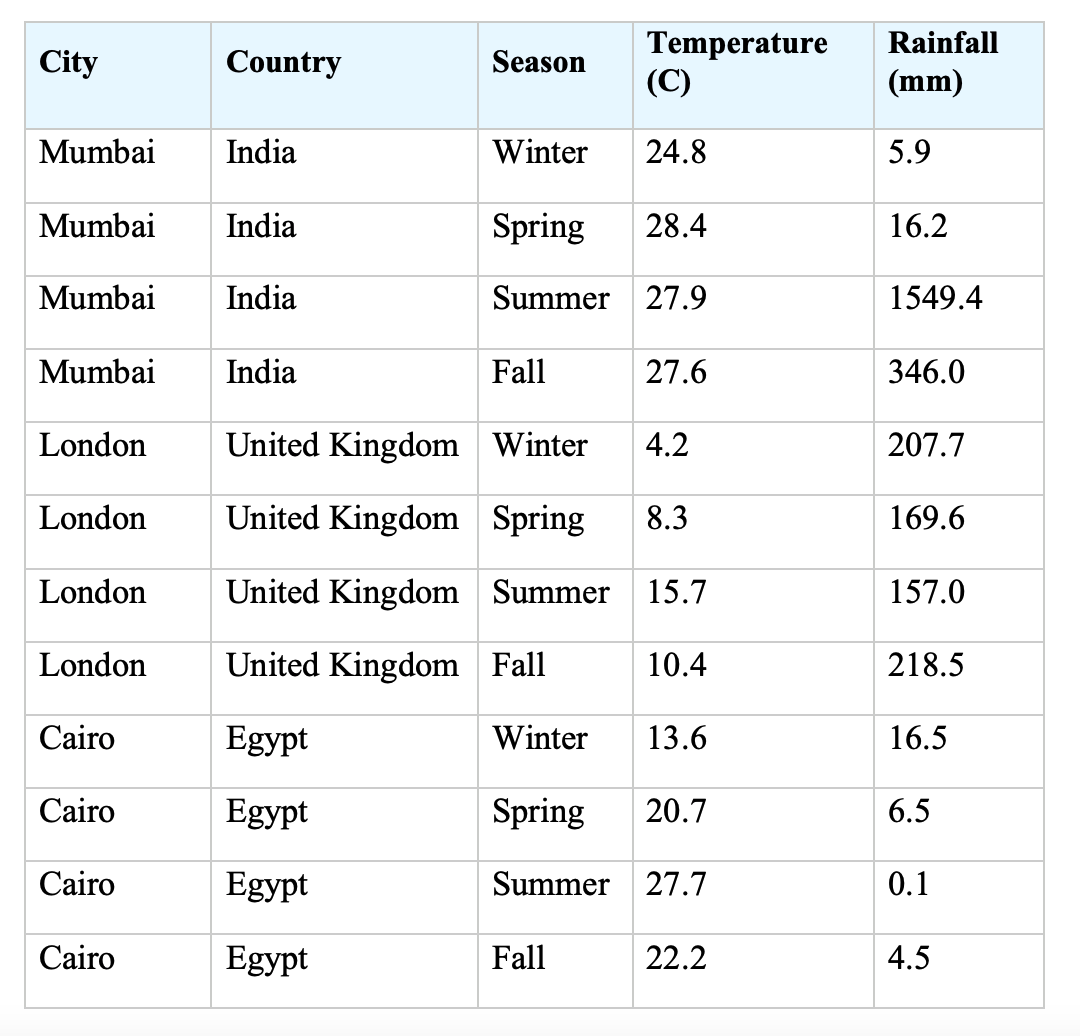

In [59]:
import sqlite3
con = sqlite3.connect('weather.db')  # connect to the database (create a new database if it doesn't exist)
 
cur = con.cursor() # create a cursor object to execute SQL commands

cur.execute("CREATE TABLE weather_data (City, Country, Season, Temperature, Rainfall)")  #create a table called weather_data

# insert values into the table using a for loop
values = [
    ['Mumbai', 'India', 'Winter', 24.8, 5.9],
    ['Mumbai', 'India', 'Spring', 28.4, 16.2],
    ['Mumbai', 'India', 'Summer', 27.9, 1549.4],
    ['Mumbai', 'India', 'Fall', 27.6, 346.0],
    ['London', 'United Kingdom', 'Winter', 4.2, 207.7],
    ['London', 'United Kingdom', 'Spring', 8.3, 169.6],
    ['London', 'United Kingdom', 'Summer', 15.7, 157.0],
    ['London', 'United Kingdom', 'Fall', 10.4, 218.5],
    ['Cairo', 'Egypt', 'Winter', 13.6, 16.5],
    ['Cairo', 'Egypt', 'Spring', 20.7, 6.5],
    ['Cairo', 'Egypt', 'Summer', 27.7, 0.1],
    ['Cairo', 'Egypt', 'Fall', 22.2, 4.5]
]

for value in values:
    cur.execute("INSERT INTO weather_data VALUES (?, ?, ?, ?, ?)", value)

con.commit() # call a committed method to ensure changes are written to weather.db
con.close() # close the file

In [60]:
#a) All the temperature data.

con = sqlite3.connect('weather.db')   
cur = con.cursor()  
cur.execute('SELECT Temperature FROM weather_data')  # execute the query to fetch all temperature data

temperature_data = cur.fetchall()  

for temperature in temperature_data:
    print(temperature[0])

24.8
28.4
27.9
27.6
4.2
8.3
15.7
10.4
13.6
20.7
27.7
22.2


In [61]:
#b) All the cities, but without repetition

con = sqlite3.connect('weather.db')
cur = con.cursor()
cur.execute("SELECT DISTINCT City FROM weather_data") 

cities = cur.fetchall()

for city in cities:
    print(city[0])

Mumbai
London
Cairo


In [62]:
#c) All the records for India
con = sqlite3.connect('weather.db')
cur = con.cursor()
cur.execute("SELECT * FROM weather_data WHERE Country = 'India'")

india_records = cur.fetchall()

for record in india_records:
    print(record)

('Mumbai', 'India', 'Winter', 24.8, 5.9)
('Mumbai', 'India', 'Spring', 28.4, 16.2)
('Mumbai', 'India', 'Summer', 27.9, 1549.4)
('Mumbai', 'India', 'Fall', 27.6, 346.0)


In [64]:
#d) All the Fall records.
con = sqlite3.connect('weather.db')
cur = con.cursor()
cur.execute("SELECT * FROM weather_data WHERE Season = 'Fall'")

fall_records = cur.fetchall()

for record in fall_records:
    print(record)

('Mumbai', 'India', 'Fall', 27.6, 346.0)
('London', 'United Kingdom', 'Fall', 10.4, 218.5)
('Cairo', 'Egypt', 'Fall', 22.2, 4.5)


In [65]:
#e) The city, country, and season for which the average rainfall is between 200 and 400 millimeters.
con = sqlite3.connect('weather.db')
cur = con.cursor()
cur.execute("SELECT City, Country, Season FROM weather_data GROUP BY City, Country, Season HAVING AVG(Rainfall) BETWEEN 200 AND 400")

records = cur.fetchall()

for record in records:
    print(record)

('London', 'United Kingdom', 'Fall')
('London', 'United Kingdom', 'Winter')
('Mumbai', 'India', 'Fall')


In [66]:
#f) The city and country for which the average Fall temperature is above 20 degrees, in increasing temperature order. 
con = sqlite3.connect('weather.db')
cur = con.cursor()
cur.execute("SELECT City, Country FROM weather_data WHERE Season = 'Fall' GROUP BY City, Country HAVING AVG(Temperature) > 20 ORDER BY AVG(Temperature)")

records = cur.fetchall()

for record in records:
    print(record)

('Cairo', 'Egypt')
('Mumbai', 'India')


In [67]:
#g) The total annual rainfall for Cairo
con = sqlite3.connect('weather.db')
cur = con.cursor()
cur.execute("SELECT SUM(Rainfall) FROM weather_data WHERE City = 'Cairo'")

total_rainfall = cur.fetchone()[0]

print(total_rainfall)

27.6


In [68]:
#h) The total rainfall for each season.
con = sqlite3.connect('weather.db')
cur = con.cursor()
cur.execute("SELECT Season, SUM(Rainfall) FROM weather_data GROUP BY Season")

records = cur.fetchall()

for record in records:
    print(record)

('Fall', 569.0)
('Spring', 192.29999999999998)
('Summer', 1706.5)
('Winter', 230.1)


Question 9
. Suppose list words is defined as follows:
>>> words = ['The', 'quick', 'brown', 'fox', 'jumps', 'over',
'the', 'lazy', 'dog']
Write list comprehension expressions that use list words and generate the following
lists:
a) ['THE', 'QUICK', 'BROWN', 'FOX', 'JUMPS', 'OVER', 'THE',
'LAZY', 'DOG']
b) ['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the',
'lazy', 'dog']
c) [3, 5, 5, 3, 5, 4, 3, 4, 3] (the list of lengths of words in list
words).
d) [['THE', 'the', 3], ['QUICK', 'quick', 5], ['BROWN',
'brown', 5], ['FOX', 'fox', 3], ['JUMPS', 'jumps', 5],
['OVER', 'over', 4], ['THE', 'the', 3], ['LAZY', 'lazy',
4], ['DOG', 'dog', 3]] (the list containing a list for every word of list
words, where each list contains the word in uppercase and lowercase and the
length of the word.)
e) ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the',
'lazy', 'dog'] (the list of words in list words containing 4 or more
characters.)

In [70]:
#a) ['THE', 'QUICK', 'BROWN', 'FOX', 'JUMPS', 'OVER', 'THE', 'LAZY', 'DOG']

words = ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']  
uppercase = [word.upper() for word in words]  # start a list comprehension, create a new list where each word is transformed to uppercase
print(uppercase) 

['THE', 'QUICK', 'BROWN', 'FOX', 'JUMPS', 'OVER', 'THE', 'LAZY', 'DOG']


In [71]:
#b) ['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the','lazy', 'dog']

words = ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']
lowercase = [word.lower() for word in words] # start a list comprehension, create a new list where each word is transformed to lowercase
print(lowercase)

['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']


In [72]:
#c) [3, 5, 5, 3, 5, 4, 3, 4, 3] (the list of lengths of words in list words).

words = ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']
word_lengths = [len(word) for word in words]  # create a new list by using list comprehension, where the length of each word will be returned
print(word_lengths)


[3, 5, 5, 3, 5, 4, 3, 4, 3]


In [73]:
#d) [['THE', 'the', 3], ['QUICK', 'quick', 5], ['BROWN','brown', 5], ['FOX', 'fox', 3], ['JUMPS', 'jumps', 5],['OVER', 'over', 4], ['THE', 'the', 3], ['LAZY', 'lazy',4], ['DOG', 'dog', 3]] 
#(the list containing a list for every word of listwords, where each list contains the word in uppercase and lowercase and thelength of the word.)words = ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']

words = ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']
word_upper_lower_len = [[word.upper(), word.lower(), len(word)] for word in words] #create a sublist containing each word in uppercase, lowercase and the legth
print(word_upper_lower_len)


[['THE', 'the', 3], ['QUICK', 'quick', 5], ['BROWN', 'brown', 5], ['FOX', 'fox', 3], ['JUMPS', 'jumps', 5], ['OVER', 'over', 4], ['THE', 'the', 3], ['LAZY', 'lazy', 4], ['DOG', 'dog', 3]]


In [76]:
#e) ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the','lazy', 'dog'] 
#(the list of words in list words containing 4 or more characters.)

words = ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']
long_words = [word for word in words if len(word) >= 4] #create a newlist where words only contain 4 or more characters
print(long_words)


['quick', 'brown', 'jumps', 'over', 'lazy']
